In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
dirpath = "/content/drive/MyDrive/Kaggle/PBC_dataset_normal_DIB/PBC_dataset_normal_DIB/"

# Segmentation with centroid approch

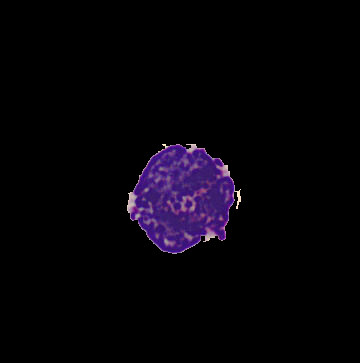

-1

In [ ]:
def process(img):
  """
  Process image
  """
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_canny = cv2.Canny(img_gray, 0, 50)
  img_dilate = cv2.dilate(img_canny, None, iterations=1)
  img_erode = cv2.erode(img_dilate, None, iterations=1)
  return img_erode

def get_masked(img):
  """
  segment an image
  paramaters:
    img: image file
  return:
    segmented image
  """
  h, w, _ = img.shape
  center = h // 2, w // 2
  contours, _ = cv2.findContours(process(img), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  for cnt in contours:
      if cv2.contourArea(cnt) > 100:
          if cv2.pointPolygonTest(cnt, center, False) > 0:
              mask = np.zeros((h, w), 'uint8')
              cv2.drawContours(mask, [cnt], -1, 255, -1)
              return cv2.bitwise_and(img, img, mask=mask)

pth = dirpath+"basophil/BA_100102.jpg"

img = cv2.imread(pth)
cv2_imshow(get_masked(img))
cv2.waitKey(0)

# Segmentation with filters approch

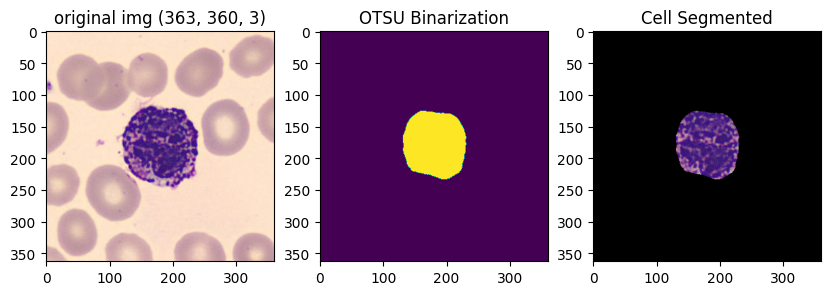

In [ ]:
def imgSeg(file, plot=True):
  image = cv2.imread(file)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  original = image
  image = cv2.blur(image,(31,31),0)
  hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  h, s, v = cv2.split(hsv)
  _, mask = cv2.threshold(s, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  result = cv2.bitwise_and(original, original, mask=mask)

  if plot:
    fig = plt.figure(figsize=(10,10))
    fig.add_subplot(1,3,1)
    plt.title("original img "+str(image.shape))
    plt.imshow(original)
    fig.add_subplot(1,3,2)
    plt.title("OTSU Binarization")
    plt.imshow(mask)
    fig.add_subplot(1,3,3)
    plt.title("Cell Segmented")
    plt.imshow(result)
    plt.show();

  return mask, result

file = dirpath + "basophil/BA_114899.jpg"
_,_  = imgSeg(file)